In [1]:
from helper_funcs import *
from experiment import *

In [2]:
sm = load_pickle('../data/sampling_methods_louisville.pickle')

In [3]:
days = [v for k, v in sm['temporal']['nhpp'].lambda_t.items()]

In [4]:
ratios = {}
for (s, d), v in sm['temporal']['nhpp'].lambda_t.items():
    for hour in v:
        ratios[d * 24 + hour['lb']] =  hour['rate']

In [42]:
dict_market_share = {0: 0.6/0.375, 1: 0.6/0.375, 2: 0.6/0.375, 3: 0.6/0.375, 4: 0.45/0.375, 5: 1, 6: 0.45/0.375}
for (season, day), rates in sm['temporal']['nhpp'].lambda_t.items():
    for h in rates:
        h['rate'] = dict_market_share[day]*h['rate']

In [44]:
with open('../data/sampling_methods_louisville.pickle', 'wb') as file:
    pickle.dump(sm, file)

In [5]:
import pandas as pd
ratios = pd.Series(ratios).to_frame('ratios').reset_index()
ratios['hour'] = ratios['index'] % 24
ratios['day'] = ratios['index'] // 24

In [8]:
!pip install pillow

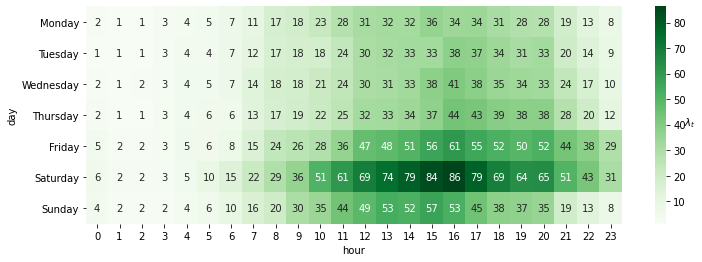

In [6]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(12, 4))
lambda_t = ratios.groupby(['day', 'hour'])['ratios'].sum().unstack()
sns.heatmap(ratios.groupby(['day', 'hour'])['ratios'].sum().unstack(),
           cmap='Greens', ax=ax, annot=True, fmt='.0f')
ax.collections[0].colorbar.set_label('$\lambda_{t}$', rotation=0)
ax.set_xticklabels(['{:.0f}'.format(h) for h in range(24)], rotation=0)
ax.set_yticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=0)
fig.savefig('arrival-ratios.jpg', dpi=300);

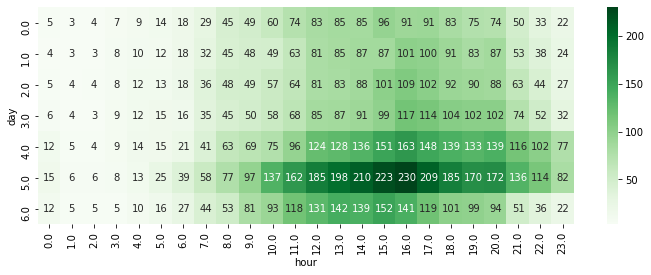

In [9]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.heatmap(lambda_t/0.375,
           cmap='Greens', annot=True, fmt='.0f')

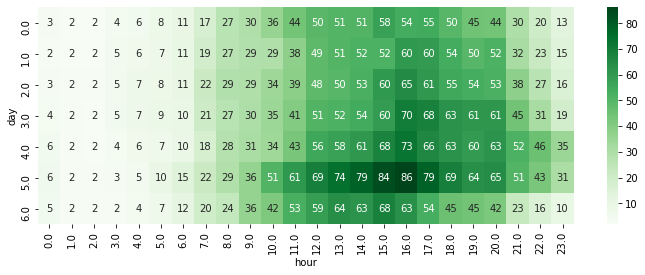

In [29]:
import numpy as np
fig, ax = plt.subplots(figsize=(12, 4))
new_lambda_t = (lambda_t/0.375)*np.array([[0.6], [0.6], [0.6], [0.6], [0.45], [0.375], [0.45]])
sns.heatmap(new_lambda_t,
           cmap='Greens', ax=ax, annot=True, fmt='.0f')

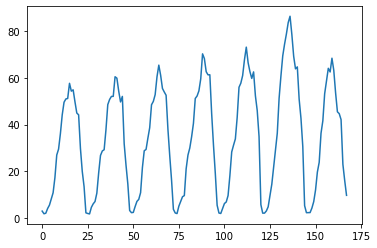

In [30]:
plt.plot(new_lambda_t.values.ravel())

In [14]:
import geopandas as gpd

replicas = []
for i in range(20):
    replicas.append(gpd.read_file('../shapes/replicas/stkde_nhpp_{}.shp'.format(i)))

In [18]:
replicas = pd.concat(replicas)
replicas['date'] = pd.to_datetime(replicas['date'])

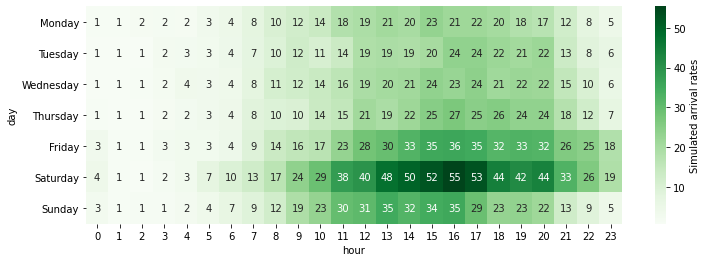

In [37]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.heatmap(replicas.groupby([replicas['date'].dt.dayofweek, replicas['date'].dt.hour]).size().unstack() / 20,
           ax=ax, cmap='Greens', annot=True, fmt='.0f')
ax.collections[0].colorbar.set_label('Simulated arrival rates')
ax.set_xticklabels(['{:.0f}'.format(h) for h in range(24)], rotation=0)
ax.set_xlabel('hour')
ax.set_ylabel('day')
ax.set_yticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=0)
fig.savefig('simulated-arrival-ratios.jpg', dpi=300);

In [52]:
length2 = (1 + 0.5**2)
cost = 2.35/length2

In [53]:
(cost/(1000**2)) * ((1000**2) + 500**2)

2.35

In [57]:
ratios.groupby(['day', 'hour'])['ratios'].sum().unstack().sum(1).mean()/4

96.24412442396313